In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from ipywidgets import interact
from matplotlib import pyplot as plt
from IPython.display import Image
plt.style.use('seaborn-whitegrid')


# First let us describe all the data stored in each table.

##ASSESSMENTS table contains information about the list of assessments for every module-presentation. The table consists of 206 rows with the following columns:

###--- code_module: Module identification code, to which the assessment belongs.

###--- code_presentation: Presentation identification code, to which the assessment belongs.

###--- id_assessment: Assessment identification number.

###--- assessment_type: A type of assessment. Three types of assessments exist—Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) and Final Exam (Exam).

###--- date: Information about the cut-off day of the assessment. If the information about the final exam cut-off day is missing, it takes place during the last week of the module-presentation.

###--- weight: The weight of the assessment. Typically, Exams are treated separately and have the weight equal to 100%; the sum of all other assessments is also 100%.


In [10]:
%load_ext google.colab.data_table

df_assessments = pd.read_csv("assessments.csv")
df_assessments.astype({'id_assessment': int}) 
df_assessments

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


code_module code_presentation  id_assessment assessment_type   date  weight
0           AAA             2013J           1752             TMA   19.0    10.0
1           AAA             2013J           1753             TMA   54.0    20.0
2           AAA             2013J           1754             TMA  117.0    20.0
3           AAA             2013J           1755             TMA  166.0    20.0
4           AAA             2013J           1756             TMA  215.0    30.0
..          ...               ...            ...             ...    ...     ...
201         GGG             2014J          37443             CMA  229.0     0.0
202         GGG             2014J          37435             TMA   61.0     0.0
203         GGG             2014J          37436             TMA  124.0     0.0
204         GGG             2014J          37437             TMA  173.0     0.0
205         GGG             2014J          37444            Exam  229.0   100.0

[206 rows x 6 columns]

##COURSES table contains the list of all available modules and their presentations. It consists of 22 rows with the following columns:

###--- code_module: Code name of the module, which serves as the identifier.

###--- code_presentation: Code name of the presentation.

###--- length: The length of the module-presentation in days from module start date to module end date.

###The structure of B and J presentations may differ and therefore it is recommended to analyse the B and J presentations separately.

In [11]:
%load_ext google.colab.data_table

df_courses = pd.read_csv("courses.csv")
df_courses

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


code_module code_presentation  module_presentation_length
0          AAA             2013J                         268
1          AAA             2014J                         269
2          BBB             2013J                         268
3          BBB             2014J                         262
4          BBB             2013B                         240
5          BBB             2014B                         234
6          CCC             2014J                         269
7          CCC             2014B                         241
8          DDD             2013J                         261
9          DDD             2014J                         262
10         DDD             2013B                         240
11         DDD             2014B                         241
12         EEE             2013J                         268
13         EEE             2014J                         269
14         EEE             2014B                         241
15         FFF             2013J                         268
16         FFF             2014J                         269
17         FFF             2013B                         240
18         FFF             2014B                         241
19         GGG             2013J                         261
20         GGG             2014J                         269
21         GGG             2014B                         241

## STUDENT ASSESSMENTS table contains the results of student's assessments. If the student does not submit the assessment, no result is recorded. Results of the final exam are usually missing (since they are scored and used for the final marking immediately at the end of the module). It consists of 173,912 rows with the following columns:

###--- id_assessment: The assessment identification number.

###--- id_student: The unique student identification number.

###--- date_submitted: The day of assessment submission.

###--- is_banked: The status flag indicating that the assessment result has been transferred from a previous presentation.

###--- score: The student’s score in this assessment. The range is from 0 to 100. The score lower than 40 is interpreted as Fail. The marks are in the range from 0 to 100.


In [12]:
%load_ext google.colab.data_table
df_sA = pd.read_csv("studentAssessment.csv")
df_sA.astype({'id_assessment': int}) 
df_sA

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


id_assessment  id_student  date_submitted  is_banked  score
0                1752       11391              18          0   78.0
1                1752       28400              22          0   70.0
2                1752       31604              17          0   72.0
3                1752       32885              26          0   69.0
4                1752       38053              19          0   79.0
...               ...         ...             ...        ...    ...
173907          37443      527538             227          0   60.0
173908          37443      534672             229          0  100.0
173909          37443      546286             215          0   80.0
173910          37443      546724             230          0  100.0
173911          37443      558486             224          0   80.0

[173912 rows x 5 columns]

## STUDENT INFO table contains student demographic information and also their results in each module they studied. It consists of 32,593 rows with the following columns:

###--- code_module: Module identification code on which the student is registered.

###--- code_presentation: Presentation identification code during which the student is registered on the module.

###--- id_student: The unique student identification number.

###--- gender: Student’s gender.

###--- region: The geographic region, where the student lived while taking the module-presentation.

###--- highest_education_ The highest student education level on entry to the module presentation.

###--- imd_band: The IMD band of the place where the student lived during the module-presentation.

###--- age_band: A band of student’s age.

###--- num_of_prev_attempts: The number of how many times the student has attempted this module.

###--- studied_credits: The total number of credits for the modules the student is currently studying.

###--- disability: Indicates whether the student has declared a disability.

###--- final_result: Student’s final result in the module-presentation.


In [13]:
%load_ext google.colab.data_table

df_si = pd.read_csv("studentInfo.csv")
df_si

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


code_module code_presentation  ...  disability final_result
0             AAA             2013J  ...           N         Pass
1             AAA             2013J  ...           N         Pass
2             AAA             2013J  ...           Y    Withdrawn
3             AAA             2013J  ...           N         Pass
4             AAA             2013J  ...           N         Pass
...           ...               ...  ...         ...          ...
32588         GGG             2014J  ...           N         Fail
32589         GGG             2014J  ...           N  Distinction
32590         GGG             2014J  ...           Y         Pass
32591         GGG             2014J  ...           N    Withdrawn
32592         GGG             2014J  ...           N  Distinction

[32593 rows x 12 columns]

## STUDENT REGISTRATION table contains information about the time when the student registered for the module presentation. For students who unregistered, the date of un-registration is also recorded. It consists of 32,593 rows with the following columns:

###--- code_module: The module identification code.

###--- code_presentation: The presentation identification code.

###--- id_student: The unique student identification number.

###--- date_registration: The day of student’s registration for the module presentation.

###--- date_unregistration: The day of student unregistration from the module presentation. Students, who completed the course have this field empty. Students who unregistered have Withdrawal as the value of the final_result in the studentInfo table.


In [14]:
%load_ext google.colab.data_table

df_sr = pd.read_csv("studentRegistration.csv")
df_sr

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


code_module code_presentation  ...  date_registration  date_unregistration
0             AAA             2013J  ...             -159.0                  NaN
1             AAA             2013J  ...              -53.0                  NaN
2             AAA             2013J  ...              -92.0                 12.0
3             AAA             2013J  ...              -52.0                  NaN
4             AAA             2013J  ...             -176.0                  NaN
...           ...               ...  ...                ...                  ...
32588         GGG             2014J  ...               -4.0                  NaN
32589         GGG             2014J  ...              -23.0                  NaN
32590         GGG             2014J  ...             -129.0                  NaN
32591         GGG             2014J  ...              -49.0                101.0
32592         GGG             2014J  ...              -28.0                  NaN

[32593 rows x 5 columns]

##The STUDENT VLE table contains information about the interaction of every student with the VLE (virtual learning environment). It consists of 10,655,280 rows with the following columns:

###--- code_module: The module identification code.

###--- code_presentation: The presentation identification code.

###--- id_student: The unique student identification number.

###--- id_site: The VLE material identification number.

###--- date: The day of student’s interaction with the material.

###--- sum_click: The number of times the student interacted with the material.


In [15]:
%load_ext google.colab.data_table

df_svle = pd.read_csv("studentVle.csv")
df_svle

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


FileNotFoundError: ignored

##The VLE table contains information about the materials available in the VLE. Typically these are HTML pages, pdf files, etc. It consists of 6,364 rows with the following columns:

###--- id_site: The identification number of the material.

###--- code_module: The identification code for the module.

###--- code_presentation: The identification code of the presentation.

###--- activity_type: The role associated with the module material.

###--- week_from: The week from which the material is planned to be used.

###--- week_to: The week until which the material is planned to be used.


In [16]:
%load_ext google.colab.data_table

df_vle = pd.read_csv("vle.csv")
df_vle

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


FileNotFoundError: ignored

#Secondly the full picture:


##Each course consists of a number of assessments (one to many relation). Module-presentation content is usually available in VLE couple of weeks before official module start. (Image taken from https://www.nature.com/articles/sdata2017171).


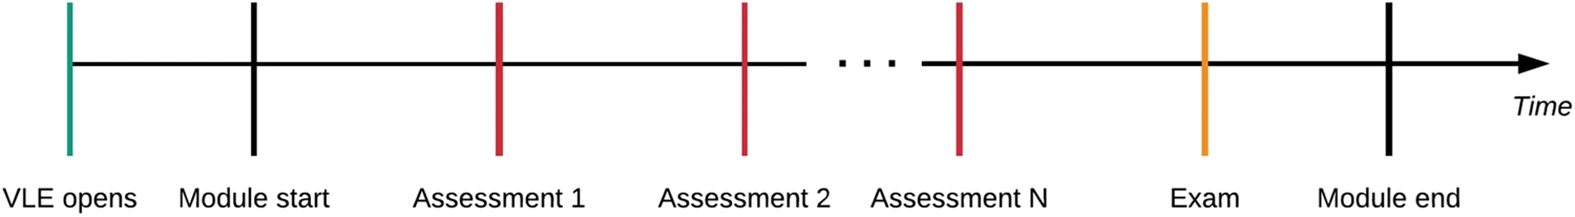

In [17]:
Image(filename='stru.jpg') 

##Each student is related with the information about his/her demographics and registrations for the modules. Since demographics and registrations can be similar among some students their correspondance not one to one, more of a many to one situation. In order to locate a student's grade on an assessment we need the student's id, module's id and the presentation of such. For each student-module-presentation triplet, the dataset contains the results of the students’ assessments and logs of student interactions with VLE. (Image taken from https://www.nature.com/articles/sdata2017171).

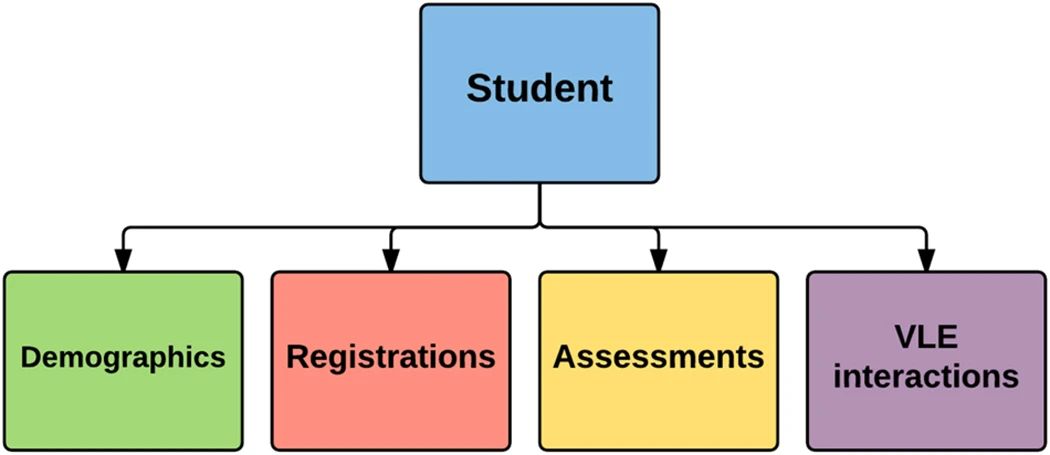

In [18]:
Image(filename='stud.jpg') 

##Table studentInfo is linked to vle courses and assessments table via coresponding "student" table. So, in order to plot some evolution in time of the grades of a course we need to know it's presentation, which assessments were left during the course, and finally study the resulting grades of all students in each specific assessment. (Image taken from https://www.nature.com/articles/sdata2017171).


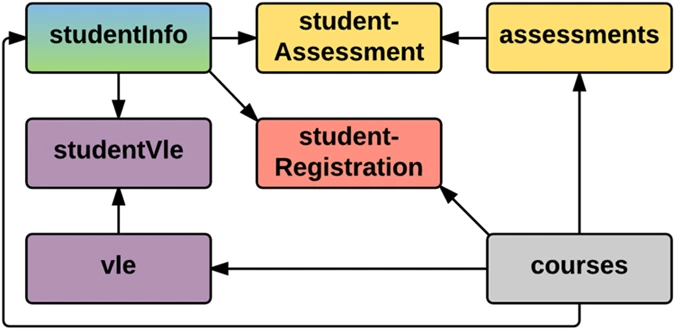

In [19]:
Image(filename='datastruc.jpg') 

In [20]:
new = df_assessments.merge(df_sA, on='id_assessment', how='right')
new

code_module code_presentation  ...  is_banked score
0              AAA             2013J  ...          0  78.0
1              AAA             2013J  ...          0  70.0
2              AAA             2013J  ...          0  72.0
3              AAA             2013J  ...          0  69.0
4              AAA             2013J  ...          0  79.0
...            ...               ...  ...        ...   ...
173907         GGG             2014J  ...          0  60.0
173908         GGG             2014J  ...          0  75.0
173909         GGG             2014J  ...          0  70.0
173910         GGG             2014J  ...          0  70.0
173911         GGG             2014J  ...          0  50.0

[173912 rows x 10 columns]

In [24]:
%load_ext google.colab.data_table
means = new.groupby('id_assessment').mean()
new2 = df_assessments.merge(means, on='id_assessment', how='right')
new2 = new2.astype({'code_module': str}, {'code_presentation':("|S")}) 

new3 = new2.sort_values(by = ['date_x'])

#new3

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


# In the table above you can see the average score related to each assessment. Now we plot.

In [39]:
new3 = new3.loc[new3['code_module']=='BBB']
A = new3.loc[new3['code_presentation']=='2013B']
B = new3.loc[new3['code_presentation']=='2014B']


AT = A.loc[A['assessment_type']=='TMA']
AC = A.loc[A['assessment_type']=='CMA']
BT = B.loc[B['assessment_type']=='TMA']
BC = B.loc[B['assessment_type']=='CMA']



In [40]:

def f(x):

    if x==1:
      plt.figure(figsize=(18, 10), dpi=80)
      plt.title('Course BBB-2013B grades', fontsize=20)
      plt.xlabel('Days since the start of the course', fontsize=20)
      plt.ylabel('Average grades/100', fontsize=20)
      plt.scatter(AT['date_x'], AT['score'], s=80, label='Tutor Marked Assessment')
      plt.scatter(AC['date_x'], AC['score'], s=80, label='Computer Marked Assessment')
      plt.legend(fontsize= 20)
    elif x==2:
      plt.figure(figsize=(18, 10), dpi=80)
      plt.title('Course BBB-2014B grades', fontsize=20)
      plt.xlabel('Days since the start of the course', fontsize=20)
      plt.ylabel('Average grades/100', fontsize=20)
      plt.scatter(BT['date_x'], BT['score'], s=80, label='Tutor Marked Assessment')
      plt.scatter(BC['date_x'], BC['score'], s=80, label='Computer Marked Assessment')
      plt.legend(fontsize= 20)
      

  

dic = {'Course: BBB-2013B':1, 'Course: BBB-2014B':2}
interact(f, x = dic)



interactive(children=(Dropdown(description='x', options={'Course: BBB-2013B': 1, 'Course: BBB-2014B': 2}, valu…

<function __main__.f>

#Here we can see the temporal behaviour of the two courses: BBB - 2013B/2014B